In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
from sklearn import tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mdaiyub/Depression-and-anxiety-prediction-on-university-students/main/Dataset/Data_Bangladesh_COVID-19.csv?token=GHSAT0AAAAAAB54E5C3IOWKUIXA5VMN4BUAY6ZLAOQ")
df.head(2)


,SL,Timestamp,Age,Sex identity,In which university do you study?,Do you have knowledge regarding the current situation of the COVID-19 pandemic?,Where do you get most of the information regarding the COVID-19?,Are you worried about getting infected by the COVID-19?,Are you worried that your family members would get infected by COVID-19?,How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?,...,Do you feel online classes are helping you in study?,Do you feel the lockdown is setting you back from your study goals?,"Before lockdown, how often did you feel confident about your ability to handle your personal problems?",Where is your current location?,Which division do you live in?,Are you living with your family?,What is the total monthly income of your family?,As a student have you ever been involved in any of the extracurricular activities during lockdown?,"Feeling nervous, anxious or on edge?","Feeling down, depressed, or hopeless?"
0,1,05-06-20 17:39,3,2,1,1,1,1,1,0,...,1,1,1,2,1,1,4,1,1,0
1,2,05-06-20 17:49,2,1,1,1,6,1,1,2,...,2,0,0,2,1,1,2,0,1,1


In [ ]:
df.drop(columns=['SL','Timestamp'],axis=1,inplace=True)
df.head(4)

,Age,Sex identity,In which university do you study?,Do you have knowledge regarding the current situation of the COVID-19 pandemic?,Where do you get most of the information regarding the COVID-19?,Are you worried about getting infected by the COVID-19?,Are you worried that your family members would get infected by COVID-19?,How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?,Are you worried about getting proper treatment if you are infected by covid-19?,"Before the lockdown, how often did you feel nervous or stressed?",...,Do you feel online classes are helping you in study?,Do you feel the lockdown is setting you back from your study goals?,"Before lockdown, how often did you feel confident about your ability to handle your personal problems?",Where is your current location?,Which division do you live in?,Are you living with your family?,What is the total monthly income of your family?,As a student have you ever been involved in any of the extracurricular activities during lockdown?,"Feeling nervous, anxious or on edge?","Feeling down, depressed, or hopeless?"
0,3,2,1,1,1,1,1,0,1,1,...,1,1,1,2,1,1,4,1,1,0
1,2,1,1,1,6,1,1,2,1,1,...,2,0,0,2,1,1,2,0,1,1
2,2,2,1,1,1,1,1,2,1,2,...,0,1,4,2,1,1,4,1,1,1
3,2,2,1,1,6,2,2,0,1,1,...,0,1,3,1,2,1,5,0,1,1


In [ ]:
df.columns

Index(['Age', 'Sex identity', 'In which university do you study?',
       'Do you have knowledge regarding the current situation of the COVID-19 pandemic?',
       'Where do you get most of the information regarding the COVID-19?',
       'Are you worried about getting infected by the COVID-19?',
       'Are you worried that your family members would get infected by COVID-19?',
       'How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?',
       'Are you worried about getting proper treatment if you are infected by covid-19?',
       'Before the lockdown, how often did you feel nervous or stressed?',
       'Are your Studies being affected due to the lockdown?',
       'Do you feel without the help of friends and teachers your studies are being affected?',
       'Do you feel online classes are helping you in study?',
       'Do you feel the lockdown is setting you back from your study goals? ',
       'Before lockdown, how often did you feel confi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 22 columns):
 #   Column                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                  --------------  -----
 0   Age                                                                                                     486 non-null    int64
 1   Sex identity                                                                                            486 non-null    int64
 2   In which university do you study?                                                                       486 non-null    int64
 3   Do you have knowledge regarding the current situation of the COVID-19 pandemic?                         486 non-null    int64
 4   Where do you get most of the information regarding the COVID-19?                                        

In [ ]:
df.rename(columns = {'Age':'attr1', 'Sex identity':'attr2', 'In which university do you study?':'attr3', 'Do you have knowledge regarding the current situation of the COVID-19 pandemic?':'attr4', 
                     'Where do you get most of the information regarding the COVID-19?':'attr5', 'Are you worried about getting infected by the COVID-19?':'attr6',
                     'Are you worried that your family members would get infected by COVID-19?':'attr7', 'How do you feel about measures taken to prevent the spread of the COVID-19 in Bangladesh?':'attr8',
                     'Are you worried about getting proper treatment if you are infected by covid-19?':'attr9', 'Before the lockdown, how often did you feel nervous or stressed?':'attr10',
                     'Are your Studies being affected due to the lockdown?':'attr11', 'Do you feel without the help of friends and teachers your studies are being affected?':'attr12',
                     'Do you feel online classes are helping you in study?':'attr13', 'Do you feel the lockdown is setting you back from your study goals? ':'attr14',
                     "Before lockdown, how often did you feel confident about your ability to handle your personal problems?":"attr15", "Where is your current location?":"attr16",
                     "Which division do you live in?":"attr17", "Are you living with your family? ": "attr18", "What is the total monthly income of your family?": "attr19",
                     "As a student have you ever been involved in any of the extracurricular activities during lockdown?": "attr20", "Feeling nervous, anxious or on edge?":"attr21",
                     "Feeling down, depressed, or hopeless?":"attr22"}, inplace = True)

In [ ]:
df.head(5)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22
0,3,2,1,1,1,1,1,0,1,1,...,1,1,1,2,1,1,4,1,1,0
1,2,1,1,1,6,1,1,2,1,1,...,2,0,0,2,1,1,2,0,1,1
2,2,2,1,1,1,1,1,2,1,2,...,0,1,4,2,1,1,4,1,1,1
3,2,2,1,1,6,2,2,0,1,1,...,0,1,3,1,2,1,5,0,1,1
4,1,2,1,1,1,1,1,0,1,1,...,0,1,4,1,2,1,3,0,1,0


In [ ]:
X=df.drop(columns=['attr21','attr22'],axis=1)
X.head(5)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20
0,3,2,1,1,1,1,1,0,1,1,1,1,1,1,1,2,1,1,4,1
1,2,1,1,1,6,1,1,2,1,1,0,0,2,0,0,2,1,1,2,0
2,2,2,1,1,1,1,1,2,1,2,1,1,0,1,4,2,1,1,4,1
3,2,2,1,1,6,2,2,0,1,1,1,1,0,1,3,1,2,1,5,0
4,1,2,1,1,1,1,1,0,1,1,1,1,0,1,4,1,2,1,3,0


In [ ]:
y_1 = df["attr21"]
y_1.head(5)

0    1
1    1
2    1
3    1
4    1
Name: attr21, dtype: int64

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y_1)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_11 <= 1.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_4 <= 6.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- feature_16 <= 2.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_4 >  3.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |--- feature_18 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_16 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_14 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_16 >  1.50
|   |   |   |   |   |   |   |   |   |

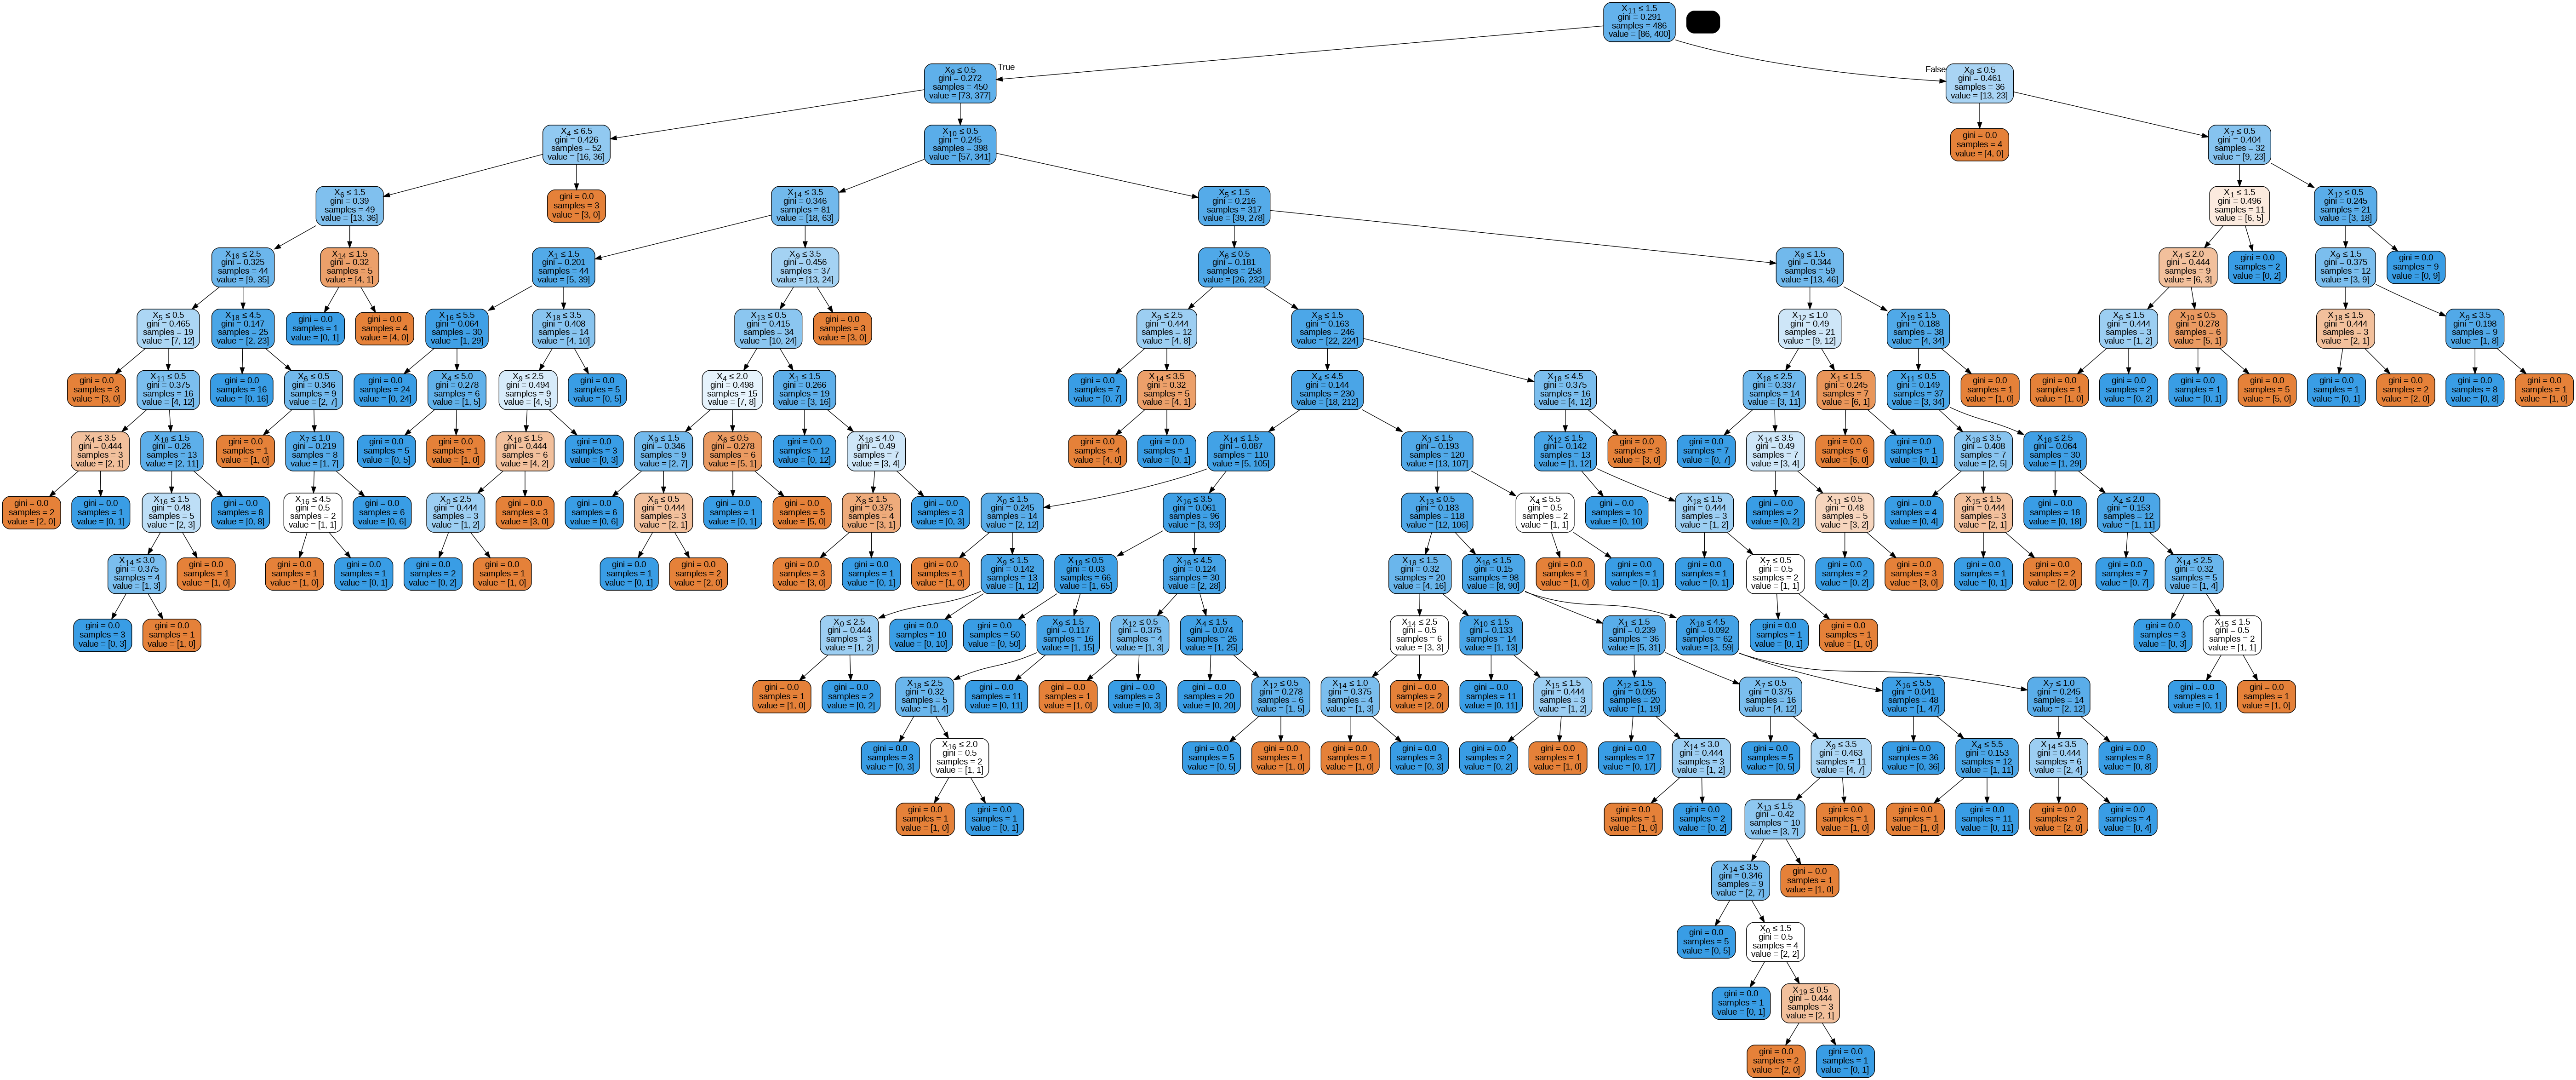

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
y_2 = df["attr22"]

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y_2)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_9 <= 1.50
|   |--- feature_4 <= 6.50
|   |   |--- feature_4 <= 5.50
|   |   |   |--- feature_6 <= 1.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_15 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_14 >  3.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |--- feature_14 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_15 >  1.50
|   |   |   |   |   |   |   |  

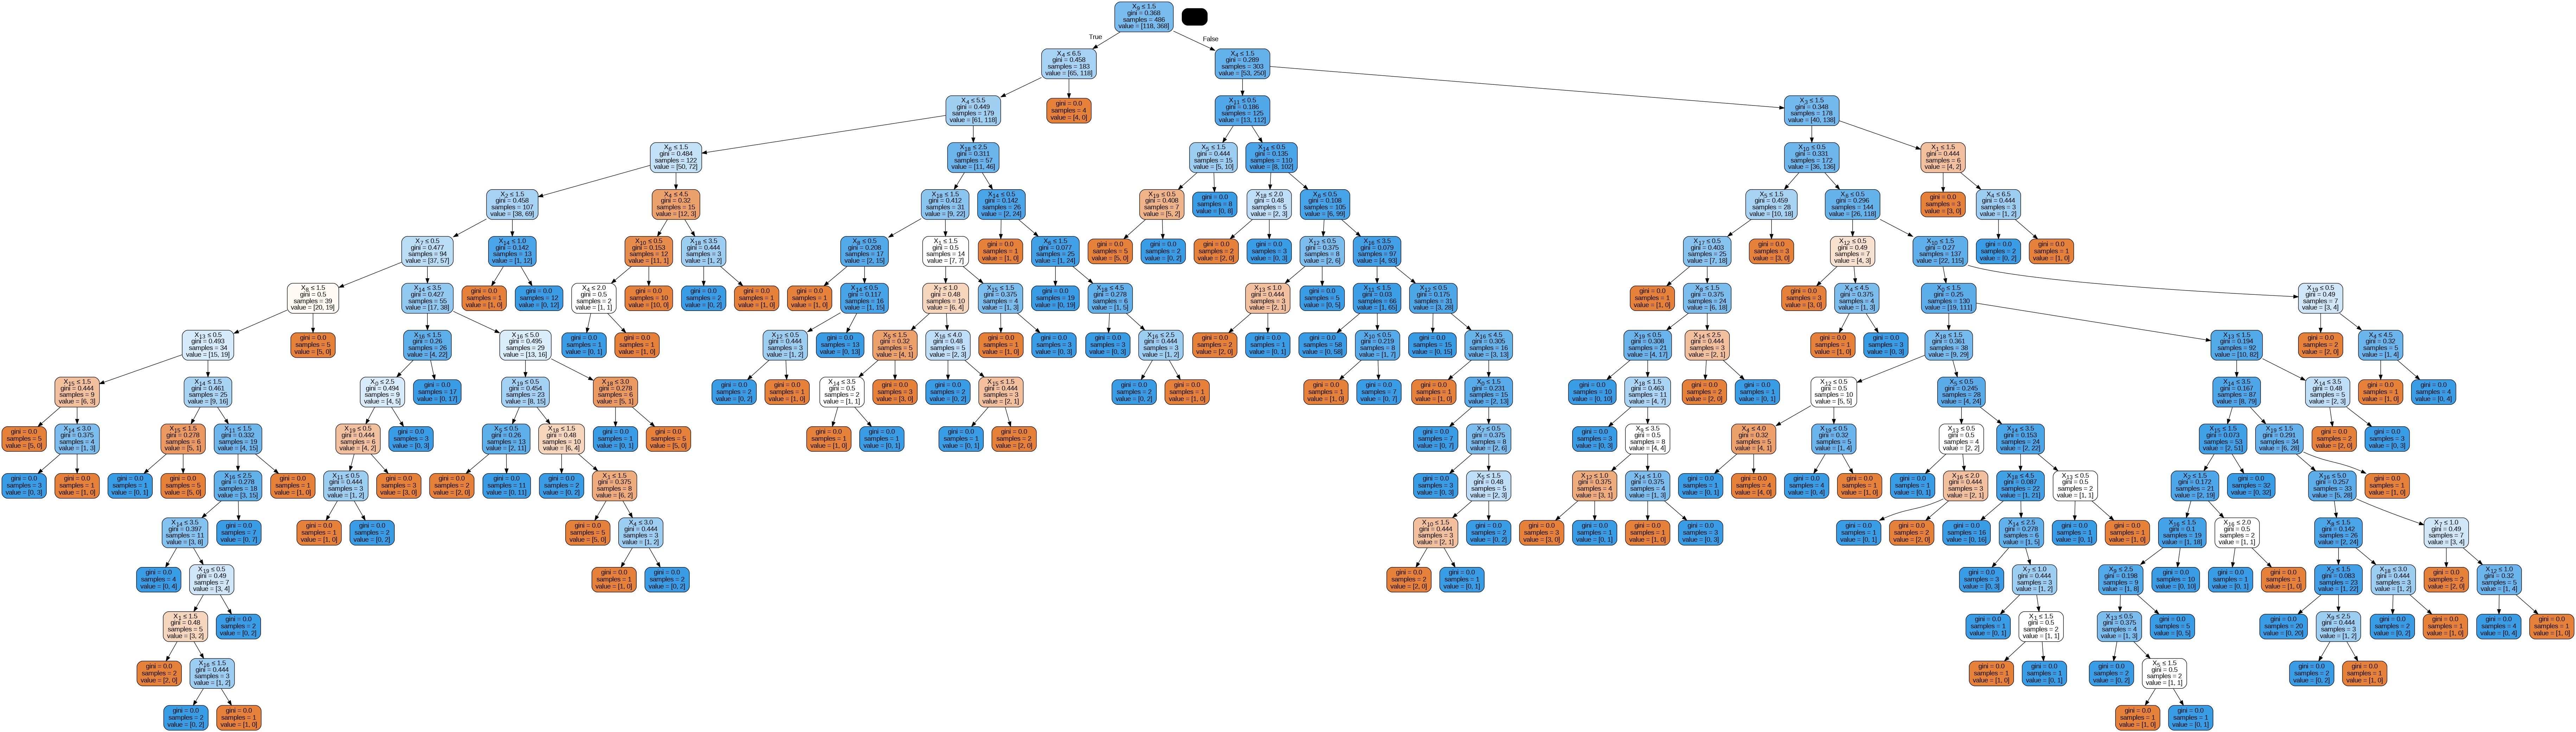

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())